<a href="https://colab.research.google.com/github/kk0mtl/2024-NLP/blob/main/embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4


In [2]:
import openai
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# github 저장을 위해 key는 제거하겠습니다.
OPENAI_API_KEY = ''
openai.api_key = OPENAI_API_KEY

In [4]:
color_words = ['red', 'blue', 'yellow', 'green', 'violet', 'cyan', 'black', 'white']

In [5]:
def get_embeddings(words):
  response = openai.Embedding.create(
    input=words,
    model="text-embedding-ada-002"
  )
  return np.array([data['embedding'] for data in response['data']])

color_embeddings = get_embeddings(color_words)

print(color_embeddings)
print(color_embeddings.shape)

[[ 9.32653347e-06 -2.47681402e-02 -2.38425098e-03 ... -1.35402735e-02
  -1.94616374e-02 -2.33412650e-03]
 [ 5.47496416e-03 -7.48624606e-03  5.67850750e-03 ... -1.05083436e-02
  -1.13984132e-02 -6.72727183e-04]
 [ 7.66185811e-03 -2.49109976e-02  4.49154852e-03 ... -1.49784684e-02
  -3.78777320e-03  3.69814131e-03]
 ...
 [ 2.15506330e-02 -1.40106883e-02  8.28977302e-03 ... -1.30039742e-02
  -4.20737220e-03  6.06198329e-04]
 [-1.51030822e-02 -3.12157646e-02  8.77943356e-03 ... -7.02627562e-03
  -8.10409337e-03 -1.47483572e-02]
 [ 6.29211031e-03 -2.45711766e-02  2.02813782e-04 ... -2.47656349e-02
   2.86999415e-03 -2.11820491e-02]]
(8, 1536)


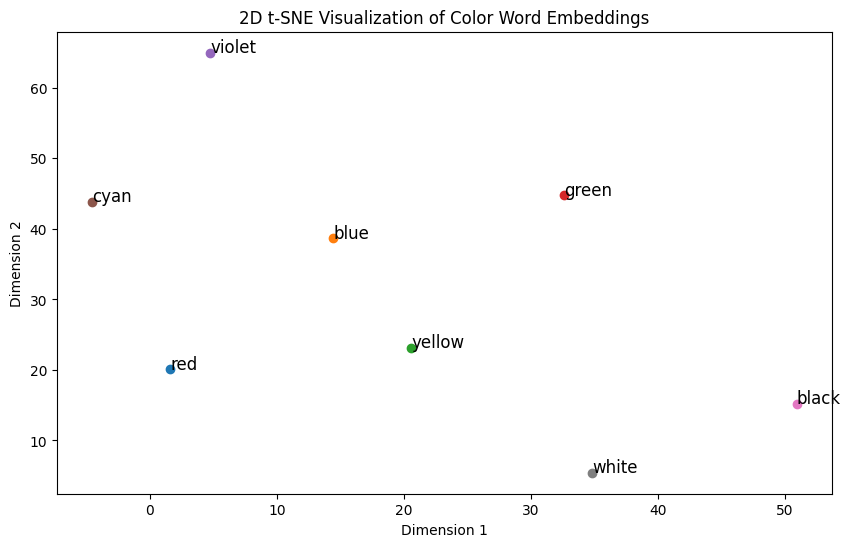

In [6]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
color_embeddings_2d = tsne.fit_transform(color_embeddings)

plt.figure(figsize=(10, 6))
for i, word in enumerate(color_words):
  plt.scatter(color_embeddings_2d[i, 0], color_embeddings_2d[i, 1])
  plt.text(color_embeddings_2d[i, 0] + 0.02, color_embeddings_2d[i, 1] + 0.02, word, fontsize=12)

plt.title('2D t-SNE Visualization of Color Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [7]:
documents = [
    "The ocean is blue",
    "The sun is bright",
    "The sky I fell in love with is rarely blue",
]

document_embeddings = get_embeddings(documents)

print(document_embeddings)
print(document_embeddings.shape)

[[ 0.01440749  0.00161666  0.01497735 ... -0.01961054 -0.00324261
  -0.00860361]
 [ 0.01407092  0.00335625 -0.00440112 ... -0.02313913  0.00249502
  -0.00444861]
 [ 0.00539287 -0.00061469  0.01653437 ... -0.00450823 -0.00240051
  -0.01503582]]
(3, 1536)


In [8]:
def find_most_similar(query, documents, document_embeddings):
  query_embedding = get_embeddings([query])[0]
  similarities = cosine_similarity([query_embedding], document_embeddings)
  most_similar_index = np.argmax(similarities)
  return documents[most_similar_index], similarities[0][most_similar_index]

query = "The sky is blue"
most_similar_document, similarity = find_most_similar(query, documents, document_embeddings)

print(f"Query: {query}")
print(f"Most similar document: {most_similar_document}")
print(f"similarity: {similarity}")

Query: The sky is blue
Most similar document: The ocean is blue
similarity: 0.9149488250258162


In [13]:
reviews = [
    "I loved this movie! It was fantastic.",
    "The film was terrible, I hated it.",
    "What an amazing movie, had a greate time watching it.",
    "The movie was a complete waste of time, very boring.",
    "Absolutely wonderful! A must-watch.",
    "Awful film. Will never watch it again.",
]

labels = [1,0,1,0,1,0]
reviews_embeddings = get_embeddings(reviews)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(reviews_embeddings, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)  # 동일할수록 1에 가까움
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [15]:
def classifier_review(review):
  review_embedding = get_embeddings([review])[0]
  prediction = classifier.predict([review_embedding])[0]
  return "Positive" if prediction == 1 else "Negative"

new_review = "The movie was fantastic and very entertaining!"
classification = classifier_review(new_review)
print(f"Review: {new_review}")
print(f"Classification: {classification}")

Review: The movie was fantastic and very entertaining!
Classification: Positive
